# What is finding an optimal solution?
Finding an optimum solution is adjusting weights and bias in the way to get the expected output. For example daiagram that devide regions.

# What is linear regions?
They are regions you can divide by drawing straight line. Like on chart below:

![title](linear_regions.png)


# How to adjust properly weights and bias?
## Visual interpretation of perceptron input
Below we have chart that show points (red and blue) they were created from $x_1$ and $x_2$ input.
Whole idea is to draw line in the way it will separate blue dots from red dots.

### From where get equation for line?
Lets start from our based equation $y = weight_1*x_1 + weight_2*x_2 + bias$ (reminder: $y=f(h), h = \sum_i w_i x_i +b$) for calculating AND for two logical inputs $x_1$ and $x_2$.

You only need to calculate the equation for a specific value! In math, 0 is often quite a good value for this. So let's substitute 0 in our equation for $ y $:
$0 = weight_1*x_1 + weight_2*x_2 + bias$

### But we still need equation!
Nothing easier! We just need do a little conversion:

$0 = weight_1*x_1 + weight_2*x_2 + bias$
moving weight_2*x_2 to left side

$-weight_2*x_2 = weight_1*x_1 + bias$
multiply both sides by -1

$weight_2*x_2 = -weight_1*x_1 - bias$
divide both sides by weight_1

$x_2 = (-weight_1*x_1 - bias)/weight_2$
we are done!

If somebody asks why we moved $weight_2*x_2$ and not $weight_1*x_1$ answer is simple, it's dosen't metter here. In these example simmilar effect we would achived if we moved $weight_1*x_1$ instead of $weight_2*x_2$.

IMPORTANT!

It is not chart of correlation between two inputs $x_1$ and $x_2$ to $y$ (in example above, AND) but correlation between $x_1$ and $x_2$!

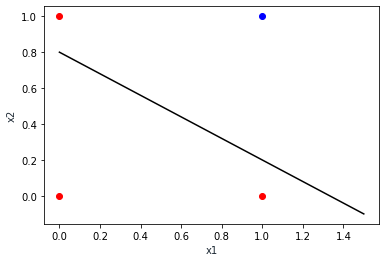

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Inputs
x1 = np.linspace(0, 1.5, 10)  # generate
w1 = 1.5  # weight for x1
w2 = 2.5  # weight for x2
b = -2.0  # bias

# Equation of y = 0 for w1*x1 + w2*x2 + b
# 0 = w1*x1 + w2*x2 + b ---after conversion--->x2 =(-w1*x1 - b)/w2
x2 =(-w1*x1 - b)/w2

plt.scatter([1], [1], c='blue')
plt.scatter([0, 0, 1], [0, 1, 0], c='red')

plt.xlabel('x1', color='#1C2833')
plt.ylabel('x2', color='#1C2833')
plt.plot(x1, x2, '-k', label='0=w1*x1+w2*x2+b')

## Learning ratio
We can achieve moving line in the way all red dots are below the line by calculating by our own all weights or by using simple trick.
If our equation looks like that:

$0 = weight_1 * x_1 + weight_2 * x_2 + bias$

and our inputs weights and bias looks like that:

$weight_1 = 1.5$

$weight_2 = 2.5$

$bias = -2.0$

From chart above we can see one point is on the "worng" side of the line from our equation. It's coorrdinates are $(0,1)$. If we want to move line closer to the point is one simple trick, just substract poitn coordinates from weights and 1 from bias.

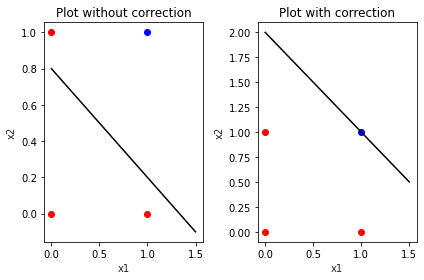

In [2]:
# Inputs for plot without correction (first plot)
x1 = np.linspace(0, 1.5, 10)  # generate
w1 = 1.5  # weight for x1
w2 = 2.5  # weight for x2
b = -2.0  # bias

# Equation of y = 0 for w1*x1 + w2*x2 + b
# 0 = w1*x1 + w2*x2 + b ---after conversion--->x2 =(-w1*x1 - b)/w2
x2 =(-w1*x1 - b)/w2

# Adding first plot 
plt.subplot(1, 2, 1)
# Adding red and blue dots to first plot
plt.scatter([1], [1], c='blue')
plt.scatter([0, 0, 1], [0, 1, 0], c='red')
# Adding labels to first plot
plt.xlabel('x1', color='#1C2833')
plt.ylabel('x2', color='#1C2833')
plt.title("Plot without correction")
# Printing first plot
plt.plot(x1, x2, '-k', label='0=w1*x1+w2*x2+b')



# Inputs for plot with correction (second plot)
x1 = np.linspace(0, 1.5, 10)  # generate
w1 = 1.5  # weight for x1
w2 = 2.5  # weight for x2
b = -2.0  # bias

# Correct the weights and bias based on point (0,1)
point = (0,1)
w1 = w1 - point[0]
w2 = w2 - point[1]
b = b-1
x2 =(-w1*x1 - b)/w2

# Adding second plot
plt.subplot(1, 2, 2)
# Adding red and blue dots to second plot
plt.scatter([1], [1], c='blue')
plt.scatter([0, 0, 1], [0, 1, 0], c='red')
# Adding labels to second plot
plt.xlabel('x1', color='#1C2833')
plt.ylabel('x2', color='#1C2833')
plt.title("Plot with correction")
# Printing second plot
plt.plot(x1, x2, '-k', label='0=w1*x1+w2*x2+b')

# Minimize the overlap of subplots
plt.tight_layout()

# Overdo
How we can see we overdo a little.

Simple solution to this is multiply our point value by very small learning ratio!

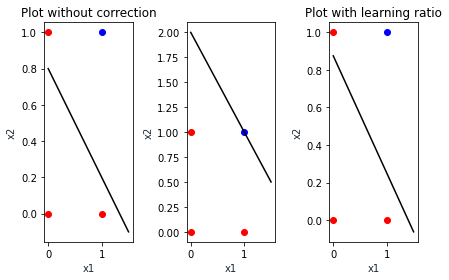

In [3]:
# Inputs for plot without correction (first plot)
x1 = np.linspace(0, 1.5, 10)  # generate
w1 = 1.5  # weight for x1
w2 = 2.5  # weight for x2
b = -2.0  # bias

# Equation of y = 0 for w1*x1 + w2*x2 + b
# 0 = w1*x1 + w2*x2 + b ---after conversion--->x2 =(-w1*x1 - b)/w2
x2 =(-w1*x1 - b)/w2

# Adding first plot 
plt.subplot(1, 3, 1)
# Adding red and blue dots to first plot
plt.scatter([1], [1], c='blue')
plt.scatter([0, 0, 1], [0, 1, 0], c='red')
# Adding labels to first plot
plt.xlabel('x1', color='#1C2833')
plt.ylabel('x2', color='#1C2833')
plt.title("Plot without correction")
# Printing first plot
plt.plot(x1, x2, '-k', label='0=w1*x1+w2*x2+b')



# Inputs for plot with correction (second plot)
x1 = np.linspace(0, 1.5, 10)  # generate
w1 = 1.5  # weight for x1
w2 = 2.5  # weight for x2
b = -2.0  # bias

# Correct the weights and bias based on point (0,1)
point = (0,1)
w1 = w1 - point[0]
w2 = w2 - point[1]
b = b-1
x2 =(-w1*x1 - b)/w2

# Adding second plot
plt.subplot(1, 3, 2)
# Adding red and blue dots to second plot
plt.scatter([1], [1], c='blue')
plt.scatter([0, 0, 1], [0, 1, 0], c='red')
# Adding labels to second plot
plt.xlabel('x1', color='#1C2833')
plt.ylabel('x2', color='#1C2833')
# Printing second plot
plt.plot(x1, x2, '-k', label='0=w1*x1+w2*x2+b')



# Inputs for plot with correction and learning ratio (third plot)
x1 = np.linspace(0, 1.5, 10)  # generate
w1 = 1.5  # weight for x1
w2 = 2.5  # weight for x2
b = -2.0  # bias

# Correct the weights and bias based on point (0,1)
learning_ratio = 0.1
point = (0,1)
w1 = w1 - point[0] * learning_ratio
w2 = w2 - point[1] * learning_ratio
b = b - 1 * learning_ratio
x2 =(-w1*x1 - b)/w2

# Adding second plot
plt.subplot(1, 3, 3)
# Adding red and blue dots to second plot
plt.scatter([1], [1], c='blue')
plt.scatter([0, 0, 1], [0, 1, 0], c='red')
# Adding labels to second plot
plt.xlabel('x1', color='#1C2833')
plt.ylabel('x2', color='#1C2833')
plt.title("Plot with learning ratio")
# Printing second plot
plt.plot(x1, x2, '-k', label='0=w1*x1+w2*x2+b')

# Minimize the overlap of subplots
plt.tight_layout()

# Perceptron implementation of perceptron weights adjudication 

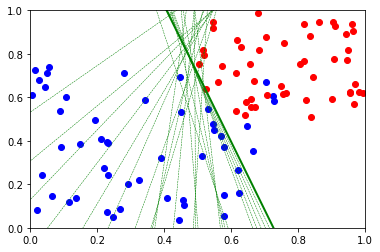

In [6]:
import matplotlib.pyplot as plt
import numpy as np
# Setting the random seed.
np.random.seed(42)


def activation_function(x2):
    """
    Calculate activation value for given input.
    
    @ param x2: the value from which we calculate the activation value.
    
    @ retutn: 1 if activation value is in wrong 
    """
    if x2 >= 0:
        return 1
    return 0


def prediction(X, W, b):
    """
    Predict value of y based on input, it's weight and bias.
    
    @ param X: input
    @ param W: weight
    @ param b: bias
    
    @ return: value of predicted y according to equation.
    """
    x2 = np.matmul(X,W)+b
    return activation_function(x2[0])


def perceptron_step(X, y, W, b, learning_ratio = 0.01):
    """
    Adjust perceptron weight and bias according to the result of the difference between Y and predicted Y.
    
    @ param X: input
    @ param W: weight
    @ param b: bias
    @ param learning_ratio: the ratio by witch we will multiply weights to not make to big "jumps" in values.
    
    @ return: recalculated weights and bias.
    """
    # For each x in X
    for i in range(len(X)):
        # Count predicted y
        y_hat = prediction(X[i],W,b)
        # If predicted y is 0, and actual y is 1, correct weights and bias.
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learning_ratio
            W[1] += X[i][1]*learning_ratio
            b += learning_ratio
        # If predicted y is 1, and actual y is 0, correct weights and bias.
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learning_ratio
            W[1] -= X[i][1]*learning_ratio
            b -= learning_ratio
        # If predicted y is the same as actual y do nothing, weights and bias are already correct.
    return W, b
    
    
def train_perceptron_algorithm(X, y, learning_ratio = 0.01, num_epochs = 25):
    """
    Train perceptron by adjusting their weights and bias.
    
    @ param X: input
    @ param y: expected output
    @ param learning_ratio: the ratio by witch we will multiply weights to not make to big "jumps" in values.
    @ param num_epochs: number of how many time we want to repeat the algorithm.
    
    @ return: boundry lines values for Linear discriminant analysis (LDA).
    """
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    
    # These are the solution lines that get plotted below.
    boundary_lines = []
    
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptron_step(X, y, W, b, learning_ratio)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


def create_data():
    """
    Generate data set and set of expected values.
    
    @ return: data set and set of expected values.
    """
    # Generate blue dots
    data_set_blue = np.random.uniform(low=0.0, high=0.75, size=(50, 2))
    # Generate red dots
    data_set_red = np.random.uniform(low=0.5, high=1.0, size=(50, 2))
    # Create one set    
    data_set = np.concatenate((data_set_blue, data_set_red))
    # Create list of expected values for data set values
    expected_values = [0] * 50 + [1] * 50
    
    return data_set, expected_values


def display_training_results(data_set, boundary_lines):
    """
    Print all lines based on boundary lines values and print values.
    
    @ param data_set: input values, our X that contains pairs (x1i, x2i).
    @ param boundary_lines: values we use to display lines based on Linear discriminant analysis (LDA).
    """
    fig, ax = plt.subplots()
    # Setting an axis range
    plt.ylim(0, 1)
    plt.xlim(0, 1)
    # Add blue dots to chart
    ax.scatter([elem[0] for elem in data_set[:50]], [elem[1] for elem in data_set[:50]], c='blue', marker='o')
    # Add red dots to chart
    ax.scatter([elem[0] for elem in data_set[-50:]], [elem[1] for elem in data_set[-50:]], c='red', marker='o')
    
    # Add lines to chart based on LDA
    for i in range(len(boundary_lines)):
        # Setting x1 in the way we can calculate x2 for two border points
        x1 = [1, 0]
        # Getting W
        w = boundary_lines[i][0]
        # Getting bias
        b = boundary_lines[i][1]
        # Calculate x2
        x2 = w*x1 + b
        # Print line
        if i != len(boundary_lines)-1:
            plt.plot(x1, x2, 'g--', linewidth=0.5)
        # If it is the last line (most adjusted) print it in the way we can see it easier on the chart
        else:
            plt.plot(x1, x2, 'g', linewidth=2)
    

def run():
    # Load data from .csv file.
    data_set, expected_values = create_data() 
    
    # Run training perceptron algorithm.
    boundary_lines = train_perceptron_algorithm(data_set, expected_values)

    # Print results
    display_training_results(data_set, boundary_lines)
    
    
run()